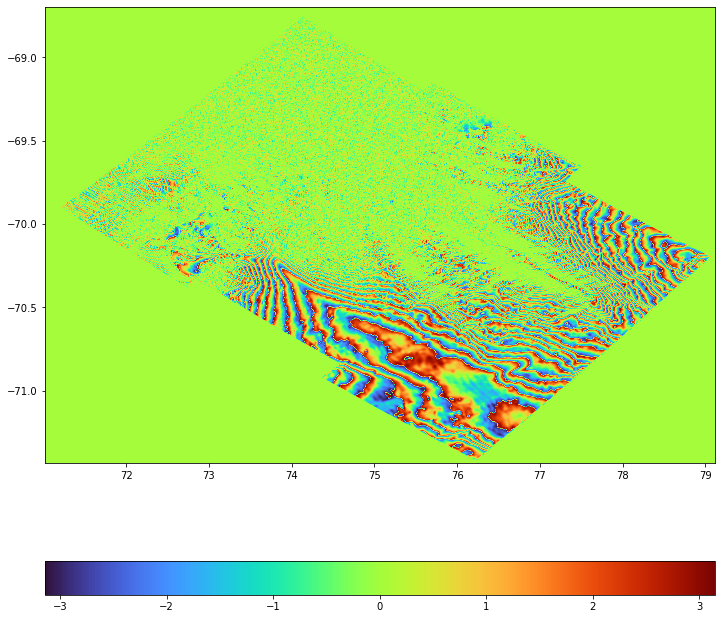

In [1]:
#!/usr/bin/env python
from osgeo import gdal
import numpy as np
from matplotlib.pyplot import imshow, figure
"""
Reads the complex output of ISCE2 and export/ plot the interferogram part in it
"""
def exportIFG(input_path, output_path, plot=True, op_driver="GTiff", figure_size=(12,12)):     
    # Read the file and extract attributes 
    ds = gdal.Open(input_path, gdal.GA_ReadOnly)
    transform = ds.GetGeoTransform()
    proj = ds.GetProjection()

    # Convert to numpy and extract the complex (interferogram) part
    combined_prod = ds.GetRasterBand(1).ReadAsArray()
    ifg = np.angle(combined_prod)
    # Export the interferogram in GTiff
    driver = gdal.GetDriverByName(op_driver)
    driver.Register()
    output = driver.Create(output_path, xsize = ifg.shape[1], ysize = ifg.shape[0], bands=1, eType = gdal.GDT_Float64)
    output.SetGeoTransform(transform)
    output.SetProjection(proj)
    outband = output.GetRasterBand(1)
    outband.WriteArray(ifg)
    outband.SetNoDataValue(np.nan)
    outband.FlushCache()
    outband = output = None

    if plot:
        firstx = transform[0]
        firsty = transform[3]
        deltay = transform[5]
        deltax = transform[1]
        lastx = firstx+combined_prod.shape[1]*deltax
        lasty = firsty+combined_prod.shape[0]*deltay
        ymin = np.min([lasty,firsty])
        ymax = np.max([lasty,firsty])
        xmin = np.min([lastx,firstx])
        xmax = np.max([lastx,firstx])
        fig = figure(figsize=figure_size)
        ax = imshow(ifg, cmap='turbo', extent=[xmin,xmax,ymin,ymax], aspect='auto')
        fig.colorbar(ax, orientation='horizontal')
    return ifg

ip = '/home/luis/Junk/delete2/filt_topophase.flat.geo'
op = '/home/luis/Junk/delete2/output.tif'
ifg = exportIFG(ip, op)
